In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [3]:
data = pd.read_csv('dataset_tenis.csv')
data.head()

,Unnamed: 0,tournament_id,tournament_match_num,player_id_x,player_id_y,player_age_x,player_age_y,player_hand_x,player_hand_y,player_rank_x,...,career_matches_won_y,career_matches_lost_y,career_matches_played_y,career_tournaments_won_y,career_tournaments_lost_y,career_tournaments_played_y,career_right_handed_won_y,career_right_handed_lost_y,career_left_handed_won_y,career_left_handed_lost_y
0,1,2014-328,4,105777,100644,23.43,17.50,R,R,11.0,...,4,6,10,0,6,6,4,5,0,1
1,5,2015-403,7,105032,100644,27.43,17.93,R,R,69.0,...,4,10,14,0,10,10,4,9,0,1
2,9,2015-403,39,104586,100644,29.67,17.93,R,R,30.0,...,5,10,15,0,10,10,5,9,0,1
3,13,2015-308,8,103794,100644,33.86,18.02,R,R,43.0,...,5,11,16,0,11,11,5,10,0,1
4,17,2015-308,17,104259,100644,31.53,18.02,R,R,26.0,...,6,11,17,0,11,11,6,10,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44505 entries, 0 to 44504
Data columns (total 97 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           44505 non-null  int64  
 1   tournament_id                        44505 non-null  object 
 2   tournament_match_num                 44505 non-null  int64  
 3   player_id_x                          44505 non-null  int64  
 4   player_id_y                          44505 non-null  int64  
 5   player_age_x                         44505 non-null  float64
 6   player_age_y                         44505 non-null  float64
 7   player_hand_x                        44505 non-null  object 
 8   player_hand_y                        44505 non-null  object 
 9   player_rank_x                        44448 non-null  float64
 10  player_rank_y                        44437 non-null  float64
 11  tournament_match_result_x   

In [5]:
# Preparamos las Labels

data = pd.get_dummies(data, columns = ['tournament_match_result_x'])
data.drop(columns = 'tournament_match_result_x_L', inplace = True)
data.rename(columns={"tournament_match_result_x_W": "Label"}, inplace = True)

In [6]:
# Primer Filtro de columnas a ojo

columnas_drop = ['Unnamed: 0','tournament_id','tournament_match_num','player_id_x','player_id_y',
'tournament_player_seed_x','tournament_player_seed_y','tournament_match_result_y']

data = data.drop(columns=columnas_drop)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44505 entries, 0 to 44504
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   player_age_x                         44505 non-null  float64
 1   player_age_y                         44505 non-null  float64
 2   player_hand_x                        44505 non-null  object 
 3   player_hand_y                        44505 non-null  object 
 4   player_rank_x                        44448 non-null  float64
 5   player_rank_y                        44437 non-null  float64
 6   tournament_match_surface_x           44505 non-null  object 
 7   tournament_sets_won_x                42832 non-null  float64
 8   tournament_sets_lost_x               42832 non-null  float64
 9   tournament_sets_played_x             42832 non-null  float64
 10  tournament_games_won_x               42832 non-null  float64
 11  tournament_games_lost_x     

In [7]:
type(data)

pandas.core.frame.DataFrame

### Sacamos nulos

In [8]:
# sacamos nulos

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42709 entries, 0 to 44504
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   player_age_x                         42709 non-null  float64
 1   player_age_y                         42709 non-null  float64
 2   player_hand_x                        42709 non-null  object 
 3   player_hand_y                        42709 non-null  object 
 4   player_rank_x                        42709 non-null  float64
 5   player_rank_y                        42709 non-null  float64
 6   tournament_match_surface_x           42709 non-null  object 
 7   tournament_sets_won_x                42709 non-null  float64
 8   tournament_sets_lost_x               42709 non-null  float64
 9   tournament_sets_played_x             42709 non-null  float64
 10  tournament_games_won_x               42709 non-null  float64
 11  tournament_games_lost_x     

In [9]:
# Preparamos dummys
dummy_cols = data.select_dtypes(include=['object'])
object_columns = dummy_cols.columns
object_columns

data =pd.get_dummies(data,columns=object_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42709 entries, 0 to 44504
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   player_age_x                         42709 non-null  float64
 1   player_age_y                         42709 non-null  float64
 2   player_rank_x                        42709 non-null  float64
 3   player_rank_y                        42709 non-null  float64
 4   tournament_sets_won_x                42709 non-null  float64
 5   tournament_sets_lost_x               42709 non-null  float64
 6   tournament_sets_played_x             42709 non-null  float64
 7   tournament_games_won_x               42709 non-null  float64
 8   tournament_games_lost_x              42709 non-null  float64
 9   tournament_games_played_x            42709 non-null  float64
 10  tournament_minutes_played_x          42709 non-null  float64
 11  season_sets_won_x           

In [10]:
# separamos features y label

data = data.reset_index()
data_x = data.drop(columns='Label')
data_y = data['Label']

In [11]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42709 entries, 0 to 42708
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                42709 non-null  int64  
 1   player_age_x                         42709 non-null  float64
 2   player_age_y                         42709 non-null  float64
 3   player_rank_x                        42709 non-null  float64
 4   player_rank_y                        42709 non-null  float64
 5   tournament_sets_won_x                42709 non-null  float64
 6   tournament_sets_lost_x               42709 non-null  float64
 7   tournament_sets_played_x             42709 non-null  float64
 8   tournament_games_won_x               42709 non-null  float64
 9   tournament_games_lost_x              42709 non-null  float64
 10  tournament_games_played_x            42709 non-null  float64
 11  tournament_minutes_played_x 

# Dataset Base

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2,random_state=0)

In [13]:
X_train.shape

(34167, 99)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2,random_state=0)

rf_clf_full = RandomForestClassifier(n_estimators=1000, 
                                     n_jobs=-1, 
                                     random_state=42)
rf_clf_full.fit(X_train, y_train)

confusion_rf = confusion_matrix(y_test, rf_clf_full.predict(X_test))
accuracy_rf = accuracy_score(y_test, rf_clf_full.predict(X_test))

print(f'La matriz de confusión es: ' '\n', confusion_rf,'\n' 'y su correspondiente accuracy es:' ,accuracy_rf)
print('\n-----------------------------\n')

La matriz de confusión es: 
 [[ 623 2249]
 [ 552 5118]] 
y su correspondiente accuracy es: 0.6720908452353079

-----------------------------



# Dataset sub1 - PCA

Dataset sub1: Del dataset original tomo las bariables dummys y le aplicamos PCA

In [15]:
data_x_dummys = data_x.select_dtypes(include='uint8')
data_x_SIN_dummys = data_x.select_dtypes(exclude='uint8')

data_x.shape, data_x_SIN_dummys.shape, data_x_dummys.shape

((42709, 99), (42709, 85), (42709, 14))

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
data_pca = pd.DataFrame(pca.fit_transform(data_x_dummys))
data_pca

,0,1,2,3
0,-0.793892,-0.136195,-0.192948,-0.162030
1,-0.793892,-0.136195,-0.192948,-0.162030
2,-0.793892,-0.136195,-0.192948,-0.162030
3,1.197688,-0.315569,-0.198147,-0.196521
4,1.197688,-0.315569,-0.198147,-0.196521
...,...,...,...,...
42704,1.209663,-0.325790,-0.191972,0.515028
42705,-0.791064,-0.135133,0.536896,-0.164157
42706,1.209663,-0.325790,-0.191972,0.515028
42707,-0.793892,-0.136195,-0.192948,-0.162030


In [17]:
data_sub_pca = pd.concat([data_x_SIN_dummys,data_pca],axis=1)
print(data_x_SIN_dummys.shape,data_pca.shape)

data_sub_pca.shape

(42709, 85) (42709, 4)


(42709, 89)

# Dataset Sub 2 - Feature Importance

A partir de un arbol simple utilizaremos el ´feature_importance´ para a partir de un threshold eliminar columnas

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(data_x,data_y)

DecisionTreeClassifier()

In [19]:
feature_tree = tree.feature_importances_
feature_tree = pd.Series(feature_tree)
feature_tree.describe()

count    99.000000
mean      0.010101
std       0.010491
min       0.000000
25%       0.003718
50%       0.008000
75%       0.013030
max       0.053844
dtype: float64

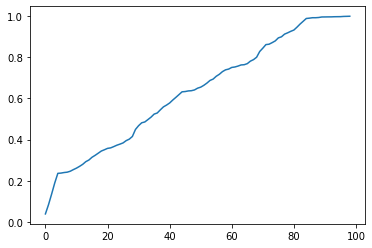

In [20]:
np.cumsum(tree.feature_importances_)
plt.plot(range(len(tree.feature_importances_)),np.cumsum(tree.feature_importances_))
plt.show()

In [21]:
for i in range(7):
    m = 0.01 + i * 0.005
    f = feature_tree > m
    print(f.sum(),' > ',m)

39  >  0.01
12  >  0.015
7  >  0.02
7  >  0.025
6  >  0.03
5  >  0.035
4  >  0.04


In [22]:
feature_mask = tree.feature_importances_ > 0.01
feature_mask

data_sub_ftimp = data_x.iloc[:,feature_mask]
data_sub_ftimp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42709 entries, 0 to 42708
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                42709 non-null  int64  
 1   player_age_x                         42709 non-null  float64
 2   player_age_y                         42709 non-null  float64
 3   player_rank_x                        42709 non-null  float64
 4   player_rank_y                        42709 non-null  float64
 5   season_sets_lost_x                   42709 non-null  int64  
 6   season_games_won_x                   42709 non-null  int64  
 7   season_games_played_x                42709 non-null  int64  
 8   season_matches_won_x                 42709 non-null  int64  
 9   season_surface_matches_won_x         42709 non-null  int64  
 10  season_surface_matches_played_x      42709 non-null  int64  
 11  career_surface_matches_won_x

# Dataset sub 3

Utilizo el metodo de los k mejores features, ver nootebook "feature_selection"

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

def select_kbest_reg(data_x,data_y,k=30,clasification=True):
    """
    Seleccionado K-Best features para regresión
    :param data_frame: Un dataframe con datos
    :param target: target en el dataframe
    :param k: cantidad deseada de features
    :devuelve un dataframe llamado feature_scores con los scores para cada feature
    """
    if clasification:
        f_function = f_classif
    else:
        f_function = f_regression
        
        
    feat_selector = SelectKBest(f_function, k=k)    
    _ = feat_selector.fit(data_x,data_y)
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_x.columns
    
    return feat_scores

kbest_feat = select_kbest_reg(data_x,data_y, k=30, clasification = True)
kbest_feat = kbest_feat.sort_values(["F Score", "P Value"], ascending=[False, False])
kbest_feat

,F Score,P Value,Support,Attribute
35,735.737923,1.171658e-160,True,career_matches_won_x
41,735.594227,1.257528e-160,True,career_right_handed_won_x
38,728.883214,3.421227e-159,True,career_tournaments_won_x
29,694.631856,7.245993e-152,True,career_surface_matches_won_x
43,692.951027,1.658697e-151,True,career_left_handed_won_x
...,...,...,...,...
89,1.876444,1.707460e-01,False,player_hand_y_R
9,0.611255,4.343200e-01,False,tournament_games_lost_x
88,0.508489,4.757977e-01,False,player_hand_y_L
93,0.008993,9.244499e-01,False,tournament_match_surface_x_Grass


In [24]:
k_best_30 = kbest_feat['Support'].index[:30]

In [25]:
data_sub_k_ftsel = data_x.iloc[:,k_best_30]

# Eliminación Recursiva de Features con Cross Validation (RFECV)

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [28]:
# kf = KFold(n_splits=5, shuffle = True)
# estimator = DecisionTreeClassifier()
# selector = RFECV(LinearRegression, step = 10, cv=kf, scoring ='neg_mean_squared_error' ,verbose=2)
# selector.fit(data_x, data_y)

In [ ]:
# Seguir...No funciona por ahora

## Juntamos los datasets

In [29]:
datasets = []

datasets.append(data_sub_pca)
datasets.append(data_sub_ftimp)
datasets.append(data_sub_k_ftsel)

# Model Deployment

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

## Bagging

#### Warning: La performance de este modelo puede afectar el rendimiento de la computadora (Saltear)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# modelo
clftree = DecisionTreeClassifier()
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=200,
                            bootstrap=True,
                            random_state=42,verbose=1, n_jobs=-1) 
# Entrenamos

bag_accuracy_pca = 0
bag_accuracy_ftimp = 0
bag_accuracy_k_ftsel = 0

for dataset in datasets:
    X_train, X_test, y_train, y_test = train_test_split(dataset,data_y,test_size=0.2,random_state=42)
    bag_clf.fit(X_train, y_train,)
    confusion = confusion_matrix(y_test, bag_clf.predict(X_test))
    accuracy = accuracy_score(y_test, bag_clf.predict(X_test))
    print(f'La matriz de confusión es: ' '\n', confusion,'\n' 'y su correspondiente accuracy es:' ,accuracy)
    print('\n-----------------------------\n')

    if bag_accuracy_pca == 0:
        bag_accuracy_pca = accuracy
    elif bag_accuracy_ftimp == 0 and bag_accuracy_pca != 0:
        bag_accuracy_ftimp = accuracy
    else:
        bag_accuracy_k_ftsel = accuracy

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:   46.7s remaining:  1.6min
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   48.5s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.9s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


La matriz de confusión es: 
 [[ 742 2150]
 [ 700 4950]] 
y su correspondiente accuracy es: 0.6663544837274643

-----------------------------



[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:   24.9s remaining:   49.8s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   25.6s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.3s remaining:    0.7s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.3s remaining:    0.7s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


La matriz de confusión es: 
 [[ 794 2098]
 [ 731 4919]] 
y su correspondiente accuracy es: 0.668812924373683

-----------------------------



[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:   17.0s remaining:   34.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   17.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.7s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.3s remaining:    0.8s


La matriz de confusión es: 
 [[ 742 2150]
 [ 804 4846]] 
y su correspondiente accuracy es: 0.6541793490985718

-----------------------------



[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.7s finished


In [274]:
print(f' El accuracy con PCA da:',bag_accuracy_pca, '\n', 'El accuracy con Feature importance da:',bag_accuracy_ftimp,'\n','El accuracy con Feature Selection da:',bag_accuracy_k_ftsel)

 El accuracy con PCA da: 0.6663544837274643 
 El accuracy con Feature importance da: 0.668812924373683 
 El accuracy con Feature Selection da: 0.6541793490985718


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1 ,class_weight='balanced',random_state=42,verbose=1)
params = {  
    "n_estimators": [25,50,100,500,1000],      # Number of boosted trees to fit.
    "max_depth": [3,5,7],            # Maximum tree depth for base learners.
    'min_samples_split':[2,5,10]
}
rf_clf = GridSearchCV(rf_clf, param_grid=params, cv=3, verbose=1, n_jobs=-1)

rf_clf.fit(X_train,y_train)

rf_clf.best_params_,rf_clf.best_score_

({'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100},
 0.6143940059121374)

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=7, min_samples_split=10, n_jobs=-1 ,random_state=42,verbose=1)

rf_accuracy_pca = 0
rf_accuracy_ftimp = 0
rf_accuracy_k_ftsel = 0

for dataset in datasets:
    X_train, X_test, y_train, y_test = train_test_split(dataset,data_y,test_size=0.2,random_state=42)
    rf_clf.fit(X_train, y_train)
    confusion = confusion_matrix(y_test, rf_clf.predict(X_test))
    accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
    print(f'La matriz de confusión es: ' '\n', confusion,'\n' 'y su correspondiente accuracy es:' ,accuracy)
    print('\n-----------------------------\n')
    
    if rf_accuracy_pca == 0:
        rf_accuracy_pca = accuracy
    elif rf_accuracy_ftimp == 0 and rf_accuracy_pca != 0:
        rf_accuracy_ftimp = accuracy
    else:
        rf_accuracy_k_ftsel = accuracy

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   25.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s


La matriz de confusión es: 
 [[ 577 2315]
 [ 492 5158]] 
y su correspondiente accuracy es: 0.6713884336221025

-----------------------------



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   20.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s


La matriz de confusión es: 
 [[ 657 2235]
 [ 597 5053]] 
y su correspondiente accuracy es: 0.6684617185670803

-----------------------------



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s


La matriz de confusión es: 
 [[ 695 2197]
 [ 736 4914]] 
y su correspondiente accuracy es: 0.6566377897447905

-----------------------------



[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:    0.4s finished


In [275]:
print(f' El accuracy con PCA da:',rf_accuracy_pca, '\n', 'El accuracy con Feature importance da:',rf_accuracy_ftimp,'\n','El accuracy con Feature selection da:',rf_accuracy_k_ftsel)

 El accuracy con PCA da: 0.6713884336221025 
 El accuracy con Feature importance da: 0.6684617185670803 
 El accuracy con Feature selection da: 0.6566377897447905


## Extra Trees

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1 ,class_weight='balanced',random_state=42,verbose=1)
params = {  
    "n_estimators": [25,50,100,500,1000],      # Number of boosted trees to fit.
    "max_depth": [3,5,7],            # Maximum tree depth for base learners.
    'min_samples_split':[2,5,10]
}
et_grid = GridSearchCV(et, param_grid=params, cv=3, verbose=1, n_jobs=-1)

et_grid.fit(X_train,y_train)

et_grid.best_params_

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 50}

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

et_accuracy_pca = 0
et_accuracy_ftimp = 0
et_accuracy_k_ftsel = 0

et = ExtraTreesClassifier(n_estimators=50,max_depth=7, min_samples_split=2, class_weight='balanced', random_state=1,verbose=1,n_jobs=-1)

for dataset in datasets:
    X_train, X_test, y_train, y_test = train_test_split(dataset,data_y,test_size=0.2,random_state=42)
    et.fit(X_train, y_train)
    confusion = confusion_matrix(y_test, et.predict(X_test))
    accuracy = accuracy_score(y_test, et.predict(X_test))
    print(confusion,'\n',accuracy)
    print('\n-----------------------------\n')
    
    if et_accuracy_pca == 0:
        et_accuracy_pca = accuracy
    elif et_accuracy_ftimp == 0 and et_accuracy_pca != 0:
        et_accuracy_ftimp = accuracy
    else:
        et_accuracy_k_ftsel = accuracy

print(f' El accuracy con PCA da:',et_accuracy_pca, '\n', 'El accuracy con Feature importance da:',et_accuracy_ftimp,'\n','El accuracy con Feature importance da:',et_accuracy_k_ftsel)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.2s finis

[[ 438 2454]
 [ 371 5279]] 
 0.6692811987824865

-----------------------------



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.2s finis

[[ 536 2356]
 [ 495 5155]] 
 0.6662374151252634

-----------------------------



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    0.1s


[[ 707 2185]
 [ 878 4772]] 
 0.6414188714586748

-----------------------------

 El accuracy con PCA da: 0.6692811987824865 
 El accuracy con Feature importance da: 0.6662374151252634 
 El accuracy con Feature importance da: 0.6414188714586748


[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 500 out of 500 | elapsed:    0.3s finished


## AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),random_state=42)
params = {  
    "n_estimators": [25,50,100,500,1000],      # Number of boosted trees to fit.
    "learning_rate": [0.01,0.1,0.05,0.15],            # Maximum tree depth for base learners.
}
ada_grid = GridSearchCV(ada_boost, param_grid=params, cv=3, verbose=1)

ada_grid.fit(X_train,y_train)

ada_grid.best_params_,ada_grid.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.6min finished


({'learning_rate': 0.01, 'n_estimators': 25}, 0.592735680627506)

In [80]:
ab_accuracy_pca = 0
ab_accuracy_ftimp = 0
ab_accuracy_k_ftsel = 0

ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=25,,learning_rate=0.01,random_state=1)
for dataset in datasets:

    
    X_train, X_test, y_train, y_test = train_test_split(dataset,data_y,test_size=0.2,random_state=42)
    ab.fit(X_train, y_train)
    confusion = confusion_matrix(y_test, ab.predict(X_test))
    accuracy = accuracy_score(y_test, ab.predict(X_test))
    print(confusion,'\n',accuracy)
    print('\n-----------------------------\n')
    
    if ab_accuracy_pca == 0:
        ab_accuracy_pca = accuracy
    elif ab_accuracy_ftimp == 0 and ab_accuracy_pca != 0:
        ab_accuracy_ftimp = accuracy
    else:
        ab_accuracy_k_ftsel = accuracy

[[1197 1695]
 [1726 3924]] 
 0.5995083118707563

-----------------------------

[[1171 1721]
 [1762 3888]] 
 0.5922500585343011

-----------------------------

[[1187 1705]
 [1801 3849]] 
 0.5895574806836806

-----------------------------



In [276]:
print(f' El accuracy con PCA da:',ab_accuracy_pca, '\n', 'El accuracy con Feature importance da:',ab_accuracy_ftimp,'\n','El accuracy con Feature selection da:',ab_accuracy_k_ftsel)

 El accuracy con PCA da: 0.5995083118707563 
 El accuracy con Feature importance da: 0.5922500585343011 
 El accuracy con Feature selection da: 0.5895574806836806


## XGBoost

In [94]:
from xgboost.sklearn import XGBClassifier

In [95]:
from sklearn.model_selection import GridSearchCV

model_xg = XGBClassifier(n_jobs=-1)
params = {  
    "n_estimators": [25,50,100],      # Number of boosted trees to fit.
    "max_depth": [3,4,5,6],            # Maximum tree depth for base learners.
    "learning_rate": [0.05, 0.1,0.15],      # Boosting learning rate (xgb’s “eta”)
}
xgb = GridSearchCV(model_xg, param_grid=params, cv=3, verbose=1, n_jobs=-1)

xgb.fit(X_train,y_train)

xgb.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 50}

In [97]:
model_xg_final = XGBClassifier(n_estimators=50,learning_rate=0.15,max_depth=3,n_jobs=-1)

xgb_accuracy_pca = 0
xgb_accuracy_ftimp = 0
xgb_accuracy_k_ftsel = 0

for dataset in datasets:
    X_train, X_test, y_train, y_test = train_test_split(dataset,data_y,test_size=0.2,random_state=42)
    model_xg_final.fit(X_train, y_train)
    confusion = confusion_matrix(y_test, model_xg_final.predict(X_test))
    accuracy = accuracy_score(y_test, model_xg_final.predict(X_test))
    print(confusion,'\n',accuracy)
    print('\n-----------------------------\n')

    if xgb_accuracy_pca == 0:
        xgb_accuracy_pca = accuracy
    elif xgb_accuracy_ftimp == 0 and xgb_accuracy_pca != 0:
        xgb_accuracy_ftimp = accuracy
    else:
        xgb_accuracy_k_ftsel = accuracy

[[ 466 2426]
 [ 327 5323]] 
 0.6777101381409506

-----------------------------

[[ 470 2422]
 [ 335 5315]] 
 0.677241863732147

-----------------------------

[[ 345 2547]
 [ 287 5363]] 
 0.6682275813626786

-----------------------------



In [277]:
print(f' El accuracy con PCA da:',xgb_accuracy_pca, '\n', 'El accuracy con Feature importance da:',xgb_accuracy_ftimp,'\n','El accuracy con Feature selection da:',xgb_accuracy_k_ftsel)

 El accuracy con PCA da: 0.6777101381409506 
 El accuracy con Feature importance da: 0.677241863732147 
 El accuracy con Feature selection da: 0.6682275813626786


In [66]:
data_y.value_counts()/data_y.shape[0]

1    0.663865
0    0.336135
Name: Label, dtype: float64

# Evaluación de modelos

### Evaluación de PCA en los modelos probados

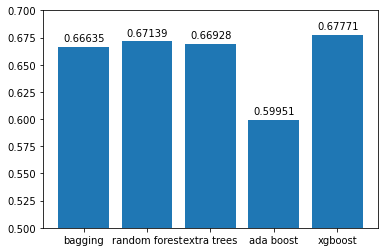

In [350]:
import numpy as np    
categories_pca = {'bagging': bag_accuracy_pca, 'random forest': rf_accuracy_pca ,'extra trees': et_accuracy_pca, 'ada boost': ab_accuracy_pca,'xgboost': xgb_accuracy_pca}
names = list(categories_pca.keys()) #nombre de las label
values = list(categories_pca.values()) #valores de labels


plt.bar(names,values)
plt.ylim(0.5, 0.70)

for index, value in enumerate(values):
    plt.text(index-0.32, value+0.005, round(float(value),5))

plt.show()

### Evaluación de Feature importance en los modelos probados

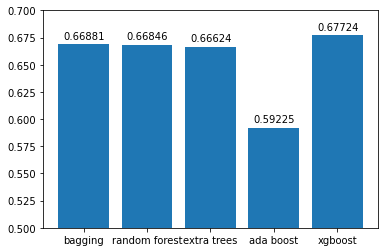

In [348]:
import numpy as np    
categories_ftimp = {'bagging': bag_accuracy_ftimp, 'random forest': rf_accuracy_ftimp ,'extra trees': et_accuracy_ftimp, 'ada boost': ab_accuracy_ftimp,'xgboost': xgb_accuracy_ftimp}
names = list(categories_ftimp.keys())    
values = list(categories_ftimp.values())


plt.bar(names,values)
plt.ylim(0.5, 0.70)

for index, value in enumerate(values):
    plt.text(index-0.32, value+0.005, round(float(value),5))

plt.show()

### Evaluación de la selección de features bajo los mejores parámetros de K en los modelos probados

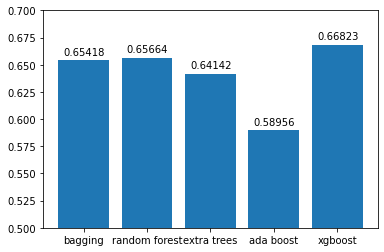

In [354]:
import numpy as np    
categories_k_ftsel = {'bagging': bag_accuracy_k_ftsel, 'random forest': rf_accuracy_k_ftsel ,'extra trees': et_accuracy_k_ftsel, 'ada boost': ab_accuracy_k_ftsel,'xgboost': xgb_accuracy_k_ftsel}
names = list(categories_k_ftsel.keys())    
values = list(categories_k_ftsel.values())


plt.bar(names,values)
plt.ylim(0.5, 0.70)

for index, value in enumerate(values):
    plt.text(index-0.32, value+0.005, round(float(value),5))

plt.show()

## Comparación de resultados de los modelos según cada método

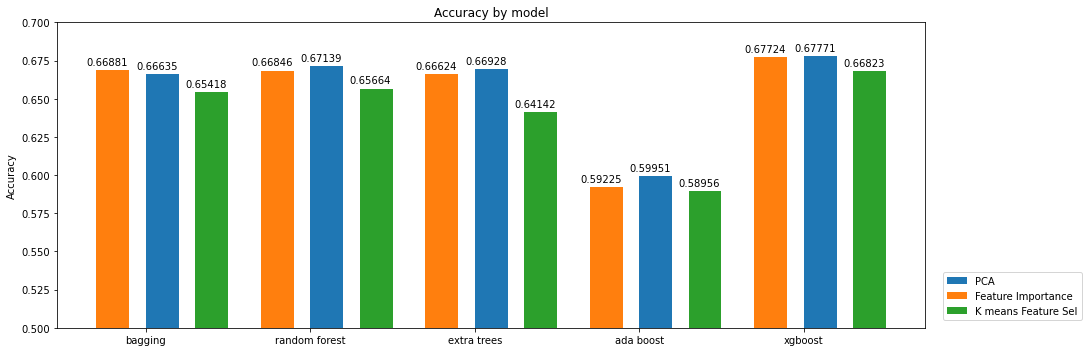

In [357]:
## import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['bagging', 'random forest', 'extra trees', 'ada boost', 'xgboost']
pca = [bag_accuracy_pca, rf_accuracy_pca , et_accuracy_pca, ab_accuracy_pca, xgb_accuracy_pca]
ftimp = [bag_accuracy_ftimp, rf_accuracy_ftimp , et_accuracy_ftimp, ab_accuracy_ftimp, xgb_accuracy_ftimp]
k_ftsel = [bag_accuracy_k_ftsel, rf_accuracy_k_ftsel , et_accuracy_k_ftsel, ab_accuracy_k_ftsel, xgb_accuracy_k_ftsel]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x + width/2, pca, width, label='PCA')
rects2 = ax.bar(x - width/1, ftimp, width, label='Feature Importance')
rects3 = ax.bar(x + width/0.5, k_ftsel, width, label='K means Feature Sel')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc="lower center", bbox_to_anchor=(0,0.01,2.2,0.02))

#ax.legend(ncol=len(labels), loc="lower center", bbox_to_anchor=(0,1.02,1,0.08), borderaxespad=0, mode="expand")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(round(float(rect.get_height()),5), #decimals=5,
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.ylim(0.5, 0.70)
plt.show()